In [60]:
#pip install pandas
# %pip install matplotlib
# %pip install seaborn
%pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --------- ------------------------------ 2.1/8.7 MB 7.9 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.7 MB 9.7 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 10.1 MB/s  0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.5 MB 11.6 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.5 MB 11.7 MB/s eta 0:00:03
   ------- -------------------------------- 7.3/38.5 MB 11.6 MB/s eta 0:00:03
   ---------- ----------------------------- 10.0/38.5 MB 11.6 MB/s eta 0:00:03
   ------------ --------------------------- 12.3/38.5 MB 11.6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("UNSW_NB15_training-set.csv")
test_df = pd.read_csv("UNSW_NB15_testing-set.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (82332, 45)
Test shape: (175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [31]:
desc = train_df.describe().T.head(10).applymap(lambda x: f"{x:,.2f}")
desc

C:\Users\USER\AppData\Local\Temp\ipykernel_6672\144188485.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc = train_df.describe().T.head(10).applymap(lambda x: f"{x:,.2f}")


,count,mean,std,min,25%,50%,75%,max
id,"82,332.00","41,166.50","23,767.35",1.00,"20,583.75","41,166.50","61,749.25","82,332.00"
dur,"82,332.00",1.01,4.71,0.00,0.00,0.01,0.72,60.00
spkts,"82,332.00",18.67,133.92,1.00,2.00,6.00,12.00,"10,646.00"
dpkts,"82,332.00",17.55,115.57,0.00,0.00,2.00,10.00,"11,018.00"
sbytes,"82,332.00","7,993.91","171,642.26",24.00,114.00,534.00,"1,280.00","14,355,774.00"
dbytes,"82,332.00","13,233.79","151,471.46",0.00,0.00,178.00,956.00,"14,657,531.00"
rate,"82,332.00","82,410.89","148,620.37",0.00,28.61,"2,650.18","111,111.11","1,000,000.00"
sttl,"82,332.00",180.97,101.51,0.00,62.00,254.00,254.00,255.00
dttl,"82,332.00",95.71,116.67,0.00,0.00,29.00,252.00,253.00
sload,"82,332.00","64,549,016.91","179,861,832.63",0.00,"11,202.47","577,003.22","65,142,856.00","5,268,000,256.00"


In [33]:
train_df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [37]:
print("train set: ",train_df['label'].value_counts(normalize=True)*100)
print("test set: ",test_df['label'].value_counts(normalize=True)*100)

train set:  label
1    55.060001
0    44.939999
Name: proportion, dtype: float64
test set:  label
1    68.062233
0    31.937767
Name: proportion, dtype: float64


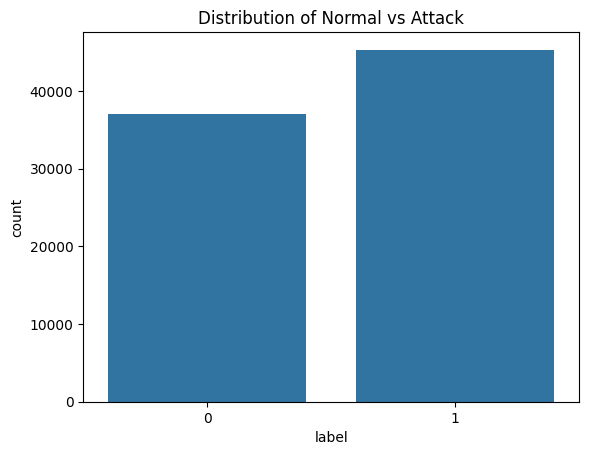

In [41]:
sns.countplot(x='label', data=train_df)
plt.title("Distribution of Normal vs Attack")
plt.show()

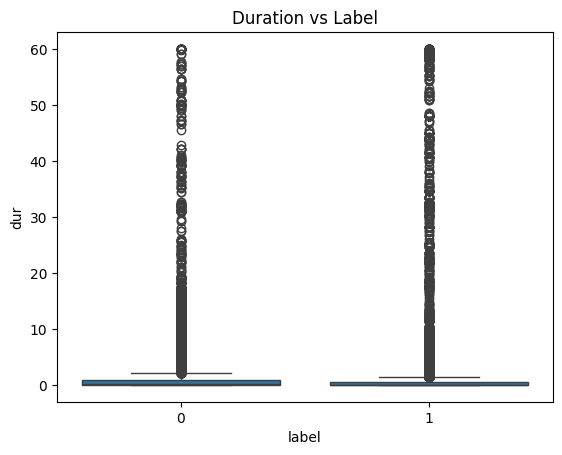

In [42]:
sns.boxplot(x='label', y='dur', data=train_df)
plt.title("Duration vs Label")
plt.show()

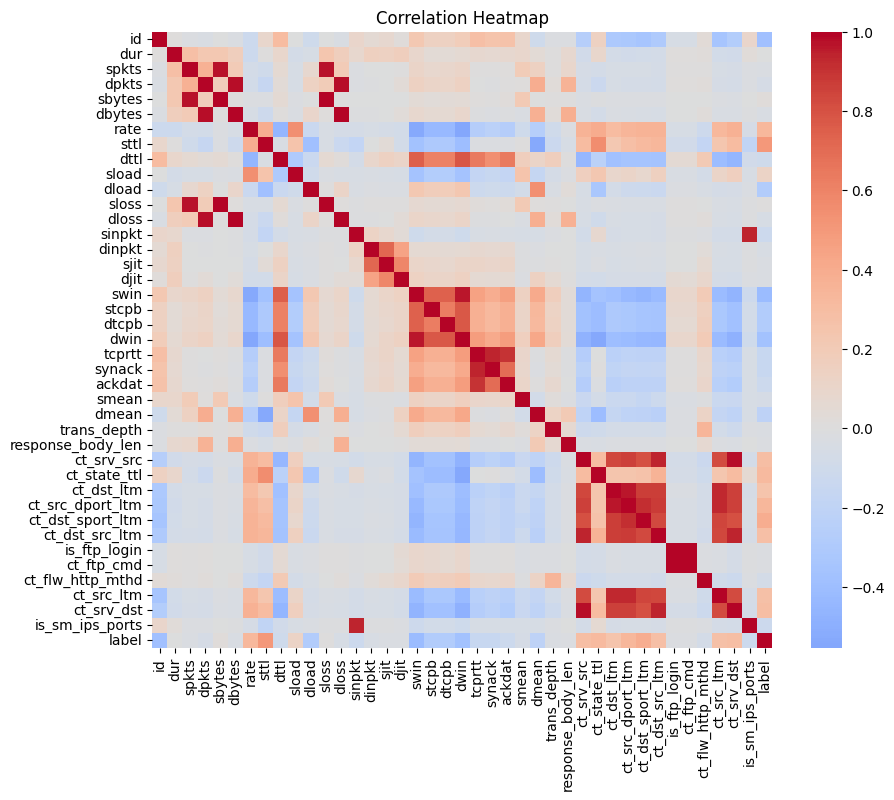

In [43]:
corr = train_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [44]:
corr = train_df.corr(numeric_only=True)['label'].sort_values(ascending=False)
display(corr.head(10))    
display(corr.tail(10))  


label               1.000000
sttl                0.504159
ct_dst_sport_ltm    0.393668
ct_src_dport_ltm    0.341513
rate                0.328629
ct_state_ttl        0.318517
ct_srv_dst          0.292931
ct_srv_src          0.290195
ct_dst_src_ltm      0.279989
ct_src_ltm          0.276494
Name: label, dtype: float64

sinpkt   -0.120768
tcprtt   -0.148800
synack   -0.149944
dmean    -0.211544
dload    -0.280534
stcpb    -0.281428
dtcpb    -0.282860
dwin     -0.369257
id       -0.387489
swin     -0.414504
Name: label, dtype: float64

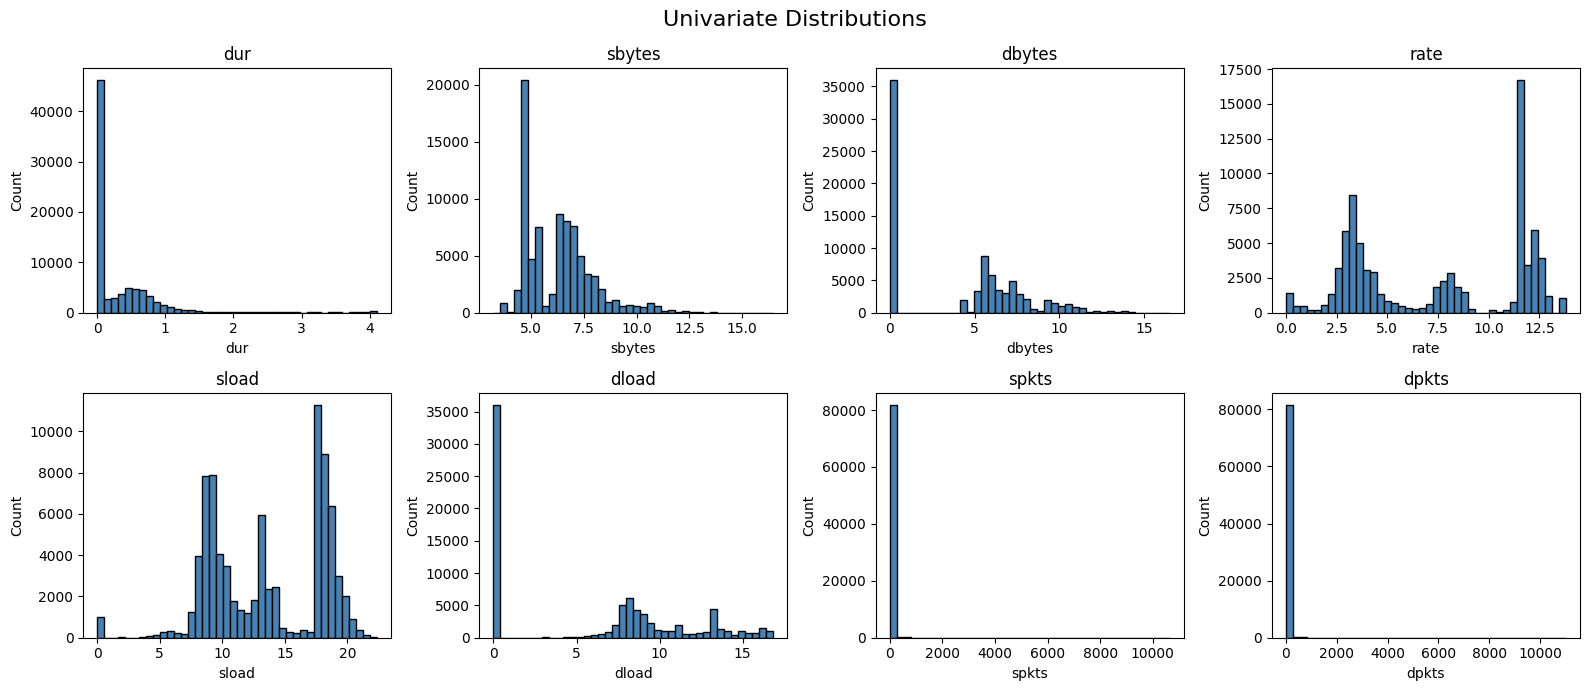

In [ ]:
import matplotlib.pyplot as plt

num_cols = ['dur','sbytes','dbytes','rate','sload','dload','spkts','dpkts']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(train_df[col], bins=40, color='steelblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Univariate Distributions", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_6672\3111388241.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=['Normal (0)', 'Attack (1)'])
C:\Users\USER\AppData\Local\Temp\ipykernel_6672\3111388241.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=['Normal (0)', 'Attack (1)'])
C:\Users\USER\AppData\Local\Temp\ipykernel_6672\3111388241.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=['Normal (0)', 'Attack (1)'])
C:\Users\USER\AppData\Local\Temp\ipykernel_6672\3111388241.py:7: MatplotlibDeprecatio

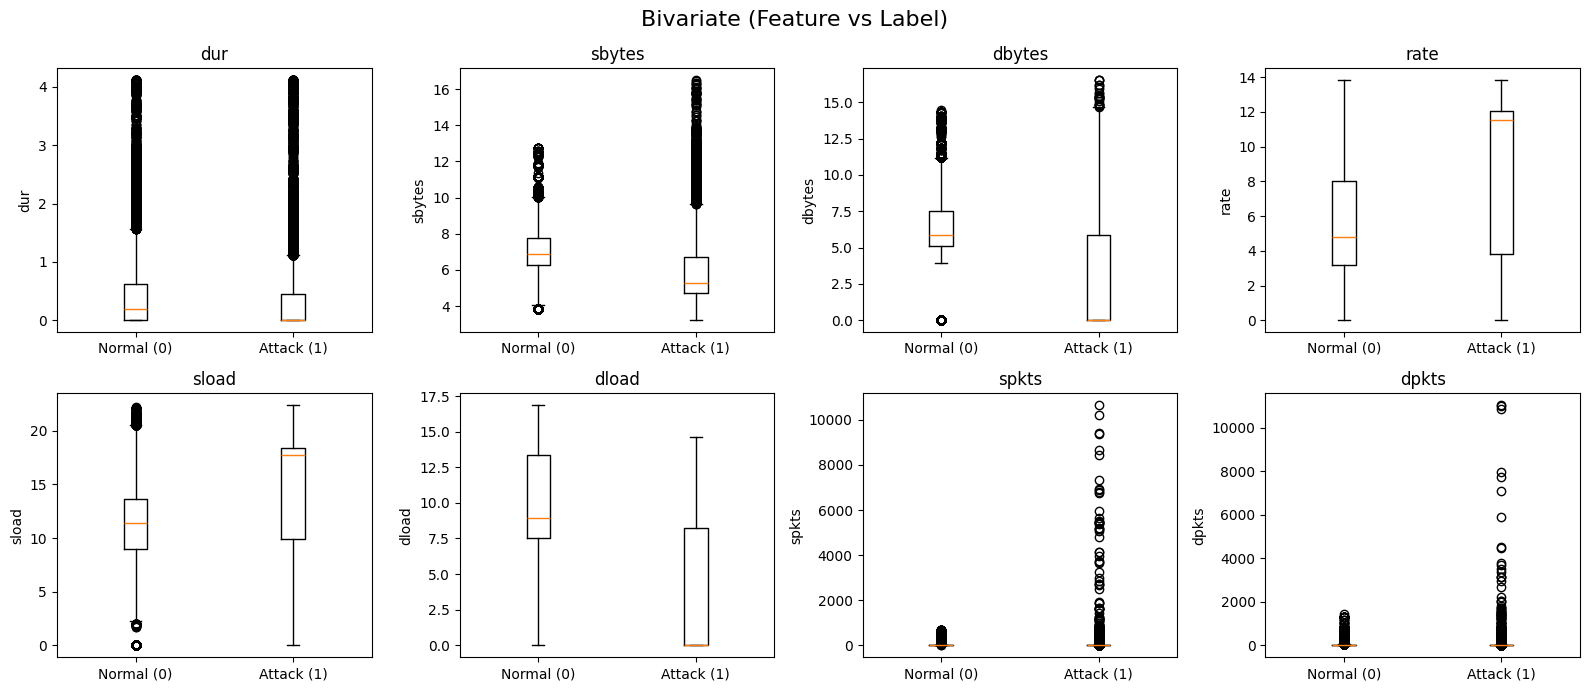

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    data0 = train_df.loc[train_df['label']==0, col]
    data1 = train_df.loc[train_df['label']==1, col]
    axes[i].boxplot([data0, data1], labels=['Normal (0)', 'Attack (1)'])
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Bivariate (Feature vs Label)", fontsize=16)
plt.tight_layout()
plt.show()


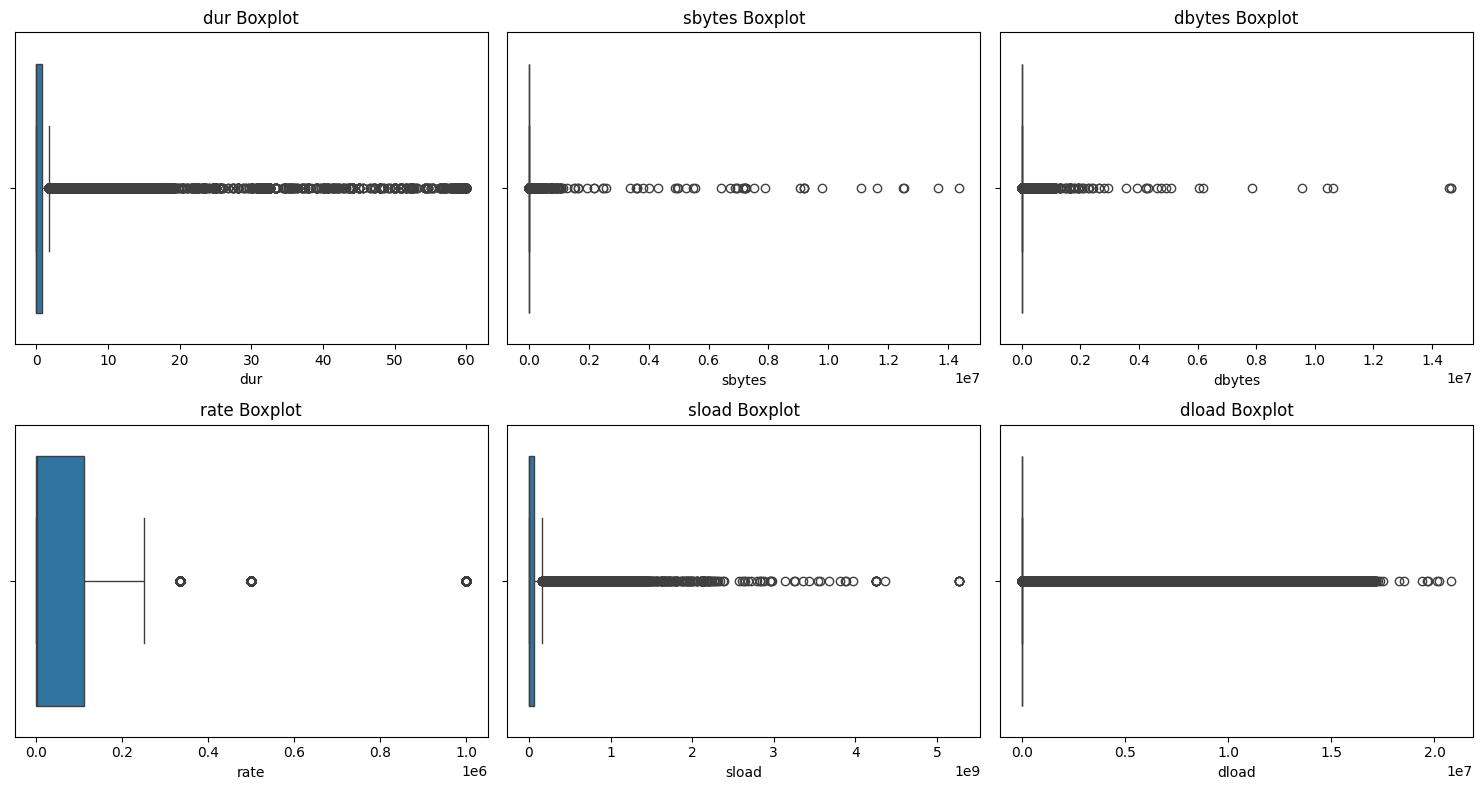

In [45]:
outlier_cols = ['dur', 'sbytes', 'dbytes', 'rate', 'sload', 'dload']

plt.figure(figsize=(15, 8))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train_df[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


In [46]:
import numpy as np

cols_to_log = ['dur', 'sbytes', 'dbytes', 'rate', 'sload', 'dload']
for col in cols_to_log:
    train_df[col] = np.log1p(train_df[col])
    test_df[col] = np.log1p(test_df[col])


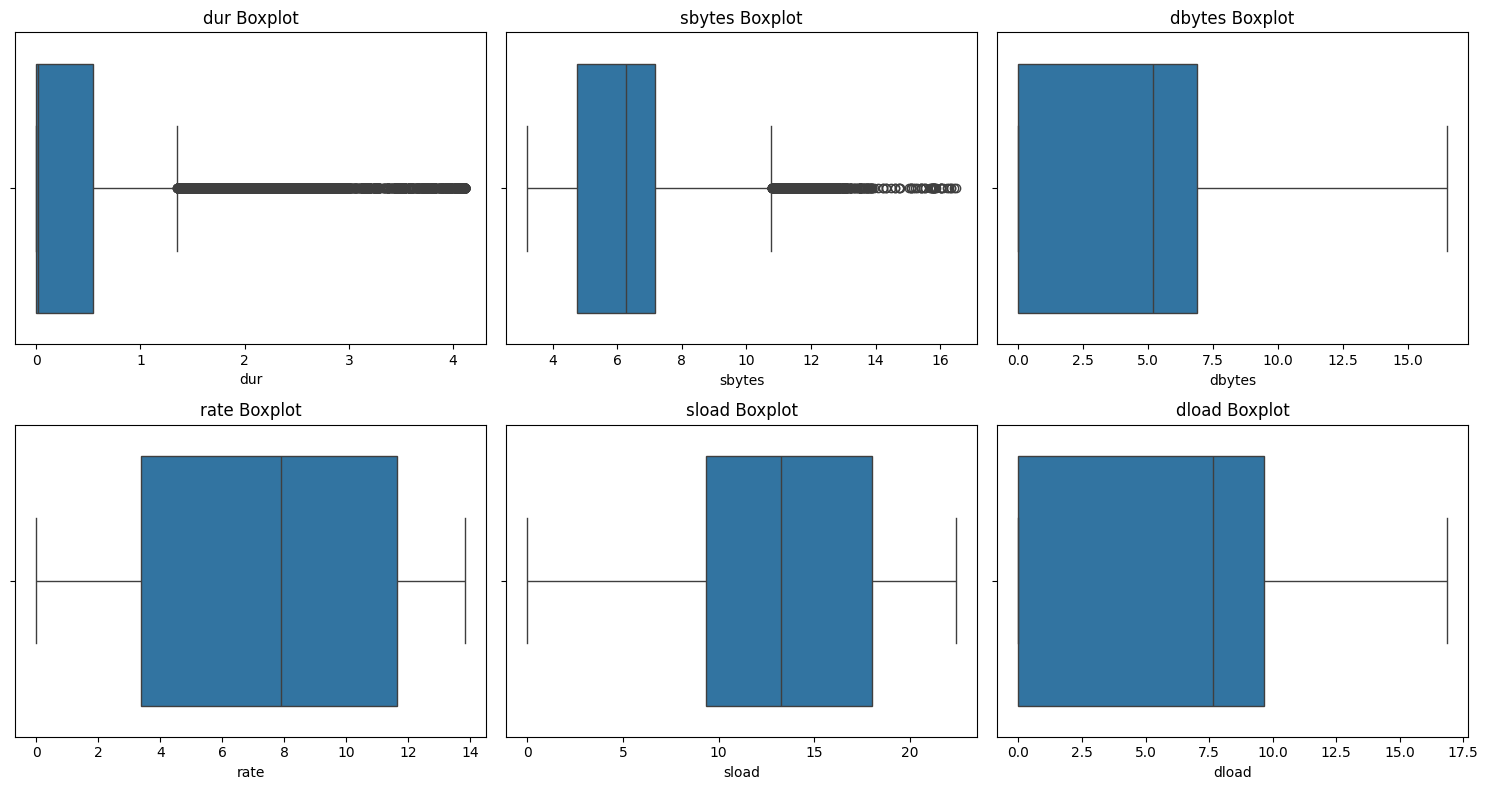

In [47]:
outlier_cols = ['dur', 'sbytes', 'dbytes', 'rate', 'sload', 'dload']

plt.figure(figsize=(15, 8))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train_df[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()


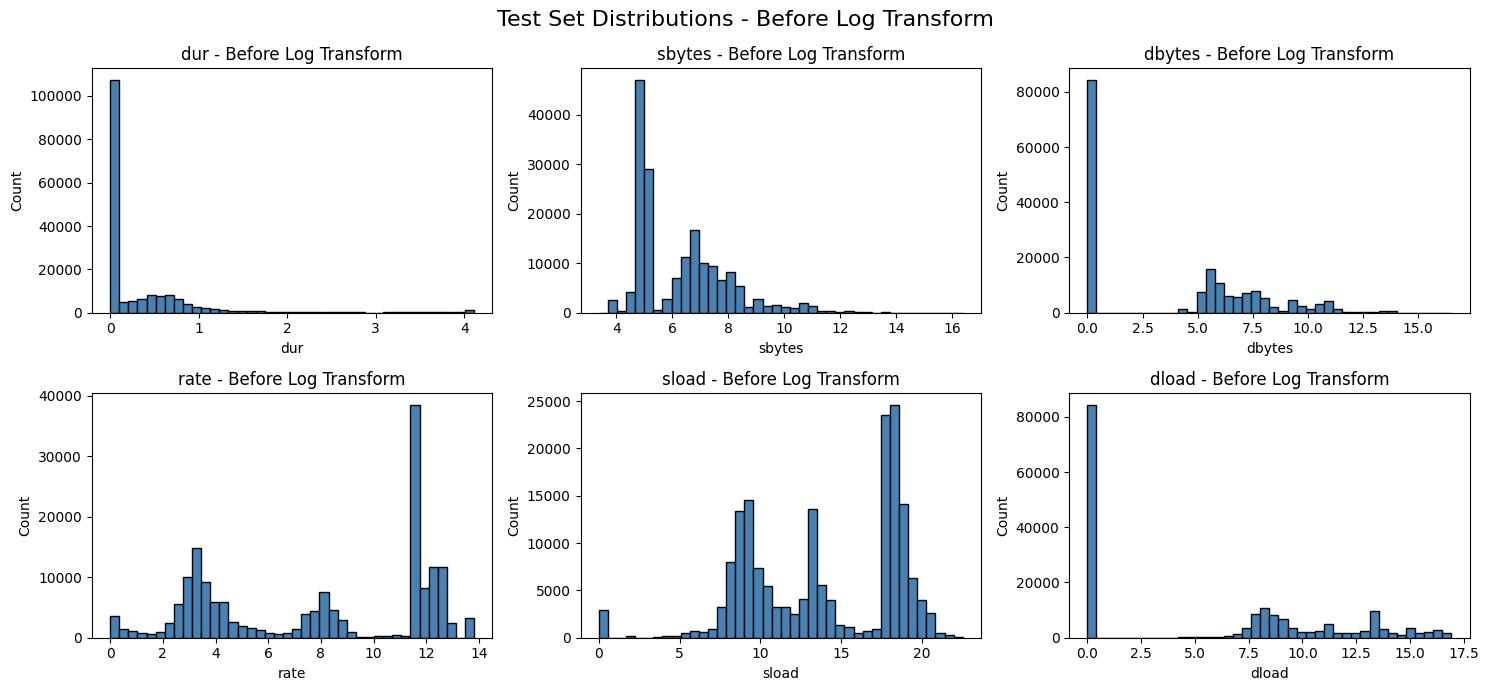

In [52]:
log_cols = ['dur', 'sbytes', 'dbytes', 'rate', 'sload', 'dload']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
axes = axes.flatten()

for i, col in enumerate(log_cols):
    axes[i].hist(test_df[col], bins=40, color='steelblue', edgecolor='black')
    axes[i].set_title(f"{col} - Before Log Transform")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.suptitle("Test Set Distributions - Before Log Transform", fontsize=16)
plt.tight_layout()
plt.show()


In [53]:
for col in log_cols:
    test_df[col] = np.log1p(test_df[col])


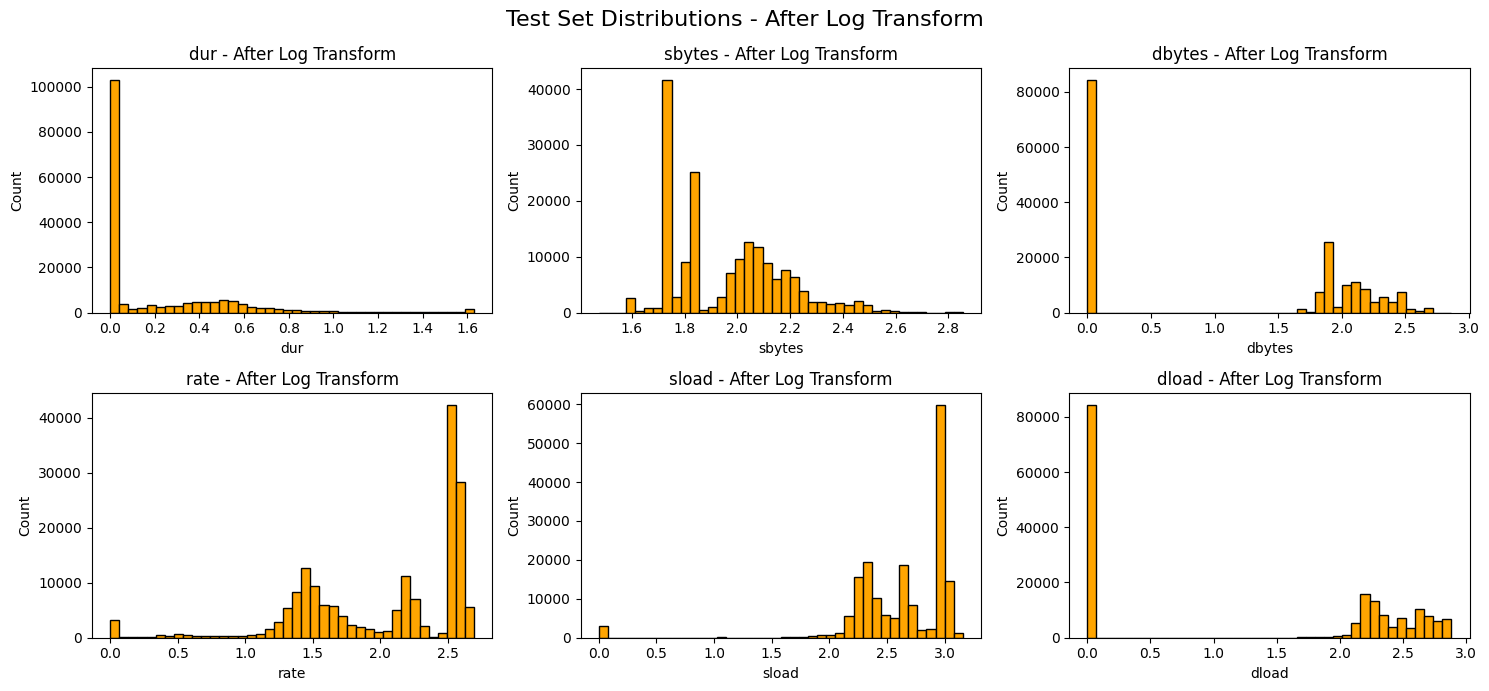

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
axes = axes.flatten()

for i, col in enumerate(log_cols):
    axes[i].hist(test_df[col], bins=40, color='orange', edgecolor='black')
    axes[i].set_title(f"{col} - After Log Transform")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.suptitle("Test Set Distributions - After Log Transform", fontsize=16)
plt.tight_layout()
plt.show()


In [55]:
drop_cols = ['id', 'attack_cat']

train_df = train_df.drop(columns=drop_cols)
test_df  = test_df.drop(columns=drop_cols)


In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype

cat_cols = ['proto','service','state']

for c in cat_cols:
    tr = train_df[c].astype(str).fillna('MISSING')
    te = test_df[c].astype(str).fillna('MISSING')

    cats = pd.Index(tr).append(pd.Index(te)).unique().tolist()
    cats = sorted(cats) 

    dtype = CategoricalDtype(categories=cats, ordered=False)
    train_df[c] = tr.astype(dtype).cat.codes
    test_df[c]  = te.astype(dtype).cat.codes


In [64]:
y_train = train_df['label'].astype(int)
X_train = train_df.drop(columns=['label']).copy()

y_test  = test_df['label'].astype(int)
X_test  = test_df.drop(columns=['label']).copy()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(82332, 42) (82332,) (175341, 42) (175341,)


In [ ]:
def add_net_features(df: pd.DataFrame) -> pd.DataFrame:
    d = df.copy()
    eps = 1e-6  

    if {'spkts','dpkts'}.issubset(d.columns):
        d['pkt_total']  = d['spkts'] + d['dpkts']
    if {'sbytes','dbytes'}.issubset(d.columns):
        d['byte_total'] = d['sbytes'] + d['dbytes']

    if {'sbytes','dbytes'}.issubset(d.columns):
        d['byte_ratio_sd']   = (d['sbytes']+eps) / (d['dbytes']+eps)
    if {'spkts','dpkts'}.issubset(d.columns):
        d['pkt_ratio_sd']    = (d['spkts']+eps) / (d['dpkts']+eps)
    if {'dur'}.issubset(d.columns):
        d['pkts_per_sec']  = d['pkt_total'] / (d['dur']+eps)
        d['bytes_per_sec'] = d['byte_total'] / (d['dur']+eps)

    
    if {'sttl','dttl'}.issubset(d.columns):
        d['ttl_diff'] = d['sttl'] - d['dttl']

    d = d.replace([np.inf,-np.inf], np.nan).fillna(0)
    return d

# تطبيقها على train و test
X_train_fe = add_net_features(X_train)
X_test_fe  = add_net_features(X_test)

print("Before:", X_train.shape, "→ After:", X_train_fe.shape)
print("Added columns:", [c for c in X_train_fe.columns if c not in X_train.columns])


Before: (82332, 42) → After: (82332, 49)
Added columns: ['pkt_total', 'byte_total', 'byte_ratio_sd', 'pkt_ratio_sd', 'pkts_per_sec', 'bytes_per_sec', 'ttl_diff']


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled  = scaler.transform(X_test_fe)

print("Shapes:", X_train_scaled.shape, X_test_scaled.shape)


Shapes: (82332, 49) (175341, 49)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report

def eval_model(name, model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    proba = model.predict_proba(X_te)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_te, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_te, y_pred, average='binary', zero_division=0)
    roc = roc_auc_score(y_te, proba) if proba is not None else None
    cm  = confusion_matrix(y_te, y_pred)

    print(f"\n===== {name}  =====")
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}"+ (f" | ROC-AUC: {roc:.3f}" if roc is not None else ""))
    print("\nClassification Report:\n", classification_report(y_te, y_pred, zero_division=0))
    print("Confusion Matrix:\n", cm)


logreg = LogisticRegression()          
eval_model("Logistic Regression", logreg, X_train_scaled, y_train, X_test_scaled, y_test)

rf = RandomForestClassifier()         
eval_model("Random Forest", rf, X_train_scaled, y_train, X_test_scaled, y_test)


c:\Users\USER\anaconda3\envs\envis424\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



===== Logistic Regression  =====
Accuracy: 0.878 | Precision: 0.862 | Recall: 0.978 | F1: 0.916 | ROC-AUC: 0.954

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.67      0.78     56000
           1       0.86      0.98      0.92    119341

    accuracy                           0.88    175341
   macro avg       0.90      0.82      0.85    175341
weighted avg       0.89      0.88      0.87    175341

Confusion Matrix:
 [[ 37293  18707]
 [  2618 116723]]

===== Random Forest  =====
Accuracy: 0.917 | Precision: 0.954 | Recall: 0.923 | F1: 0.938 | ROC-AUC: 0.972

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.87     56000
           1       0.95      0.92      0.94    119341

    accuracy                           0.92    175341
   macro avg       0.90      0.91      0.91    175341
weighted avg       0.92      0.92      0.92    175341

Confusion Matrix:
 [